In [17]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from PIL import Image

In [18]:
##################  Parameter ###############
K = 5
FILESRC = 'D:\Program Annex\jpDigitalRecognit\\\\'

In [19]:
##################  Read data ###############
def readData(src):
    train_src = src + 'trainDigits\\\\'
    test_src = src +'testDigits\\\\'
    train_labels = []
    test_labels = []
    
    # get  the name of all file
    train_file_list = listdir(train_src)
    test_file_list = listdir(test_src)
    
    # get the number of file
    train_num = len(train_file_list)
    test_num = len(test_file_list)
    
    # get the matrix of  all file
    train_matrix = np.zeros((train_num, 1024))
    test_matrix = np.zeros((test_num, 1024))
    
    # get all train file matrix
    for i in range(train_num):
        file_name = train_file_list[i] # get file name
        file_label = int(file_name.split('_')[0]) # get file label
        train_labels.append(file_label) # keep label
        file_path = train_src + file_name
        train_matrix[i , :] = mat2vect(file_path) # compute data
    
    # the same as train data
    for i in range(test_num):
        file_name = test_file_list[i] # get file name
        file_label = int(file_name.split('_')[0]) # get file label
        test_labels.append(file_label) # keep label
        file_path = test_src + file_name
        test_matrix[i , :] = mat2vect(file_path) # compute data
    
    
    return train_matrix, train_labels, test_matrix, test_labels

In [20]:
################## matrix file to vector ###########
def mat2vect(file_path):
    v = np.zeros((1, 1024))
    fp = open(file_path)
    # 32 * 32 matrix
    for i in range(32):
        line = fp.readline()
        for j in range(32):
            v[0, 32 * i + j] = int(line[j])

    return v

In [21]:
def lists_plot(lists, llen):
    
    plt.figure(figsize=(50, 50))
    for i in range(len(lists)):
        plt.subplot(5, 2, i + 1)
        
        # 绘制图像
        X_test = np.linspace(1, llen[i], llen[i])
        plt.plot(X_test, np.sort(lists[i][0 : llen[i]]), label="k-value")
        plt.xlabel("num", fontsize=12)
        plt.ylabel("k-value", fontsize=12)
        plt.grid
        plt.title("The fig. of num %d" %(i))

----------------------  Main Algorithm  -------------------

In [22]:
def kmeans(vec):
    mat = vec.reshape(32, 32)
    wei_vec = np.linspace(1, 1024, 1024)
    wei_vec = wei_vec.astype(np.int16)
    wei_mat = wei_vec.reshape(32, 32)
    com_mat = wei_mat * mat
    
    mat_val = np.sum(com_mat)
    mat_val = mat_val / 1024    
    
    return mat_val

In [23]:
##### weighting knn
def knn_2(test_vector, train_matrix, train_labels, k):
    # compute distance
    
    train_size = train_matrix.shape[0]
#     test_diff_mat = np.tile(test_vector, (train_size, 1)) - train_matrix # test vector-> martix   ,  make diff 
    wei_vect = np.linspace(1, 1024, 1024)
    test_mat = np.tile(test_vector, (train_size, 1))
    wei_mat = np.tile(wei_vect, (train_size, 1))
    
    test_mat_wei = test_mat * wei_mat
    train_matrix_wei = train_matrix *wei_mat
    
    test_diff_mat = test_mat_wei - train_matrix_wei
    test_diff_mat_sq = test_diff_mat ** 2
    test_mat_sum = test_diff_mat_sq.sum(axis = 1)
    test_distance = test_mat_sum ** 0.5 # compute distance
    
    
    distance_sorted_index = test_distance.argsort() # return the index of sorted 
    
    # get count
    class_count = {}
    for i in range(k):
        t_label = train_labels[distance_sorted_index[i]]
        class_count[t_label] = class_count.get(t_label, 0) + 1 # label add one
    class_count_sort = sorted(class_count.items(), key = operator.itemgetter(1), reverse=True) # descending order 
        
    return class_count_sort[0][0]

-------------------------   Main   ----------------------------

In [14]:
## variable
all_num = 0
error_num = 0
corrcet_num = 0
corrcet_percent = 0

In [15]:
## read data
train_matrix,  train_label, test_matrix, test_label = readData(FILESRC)

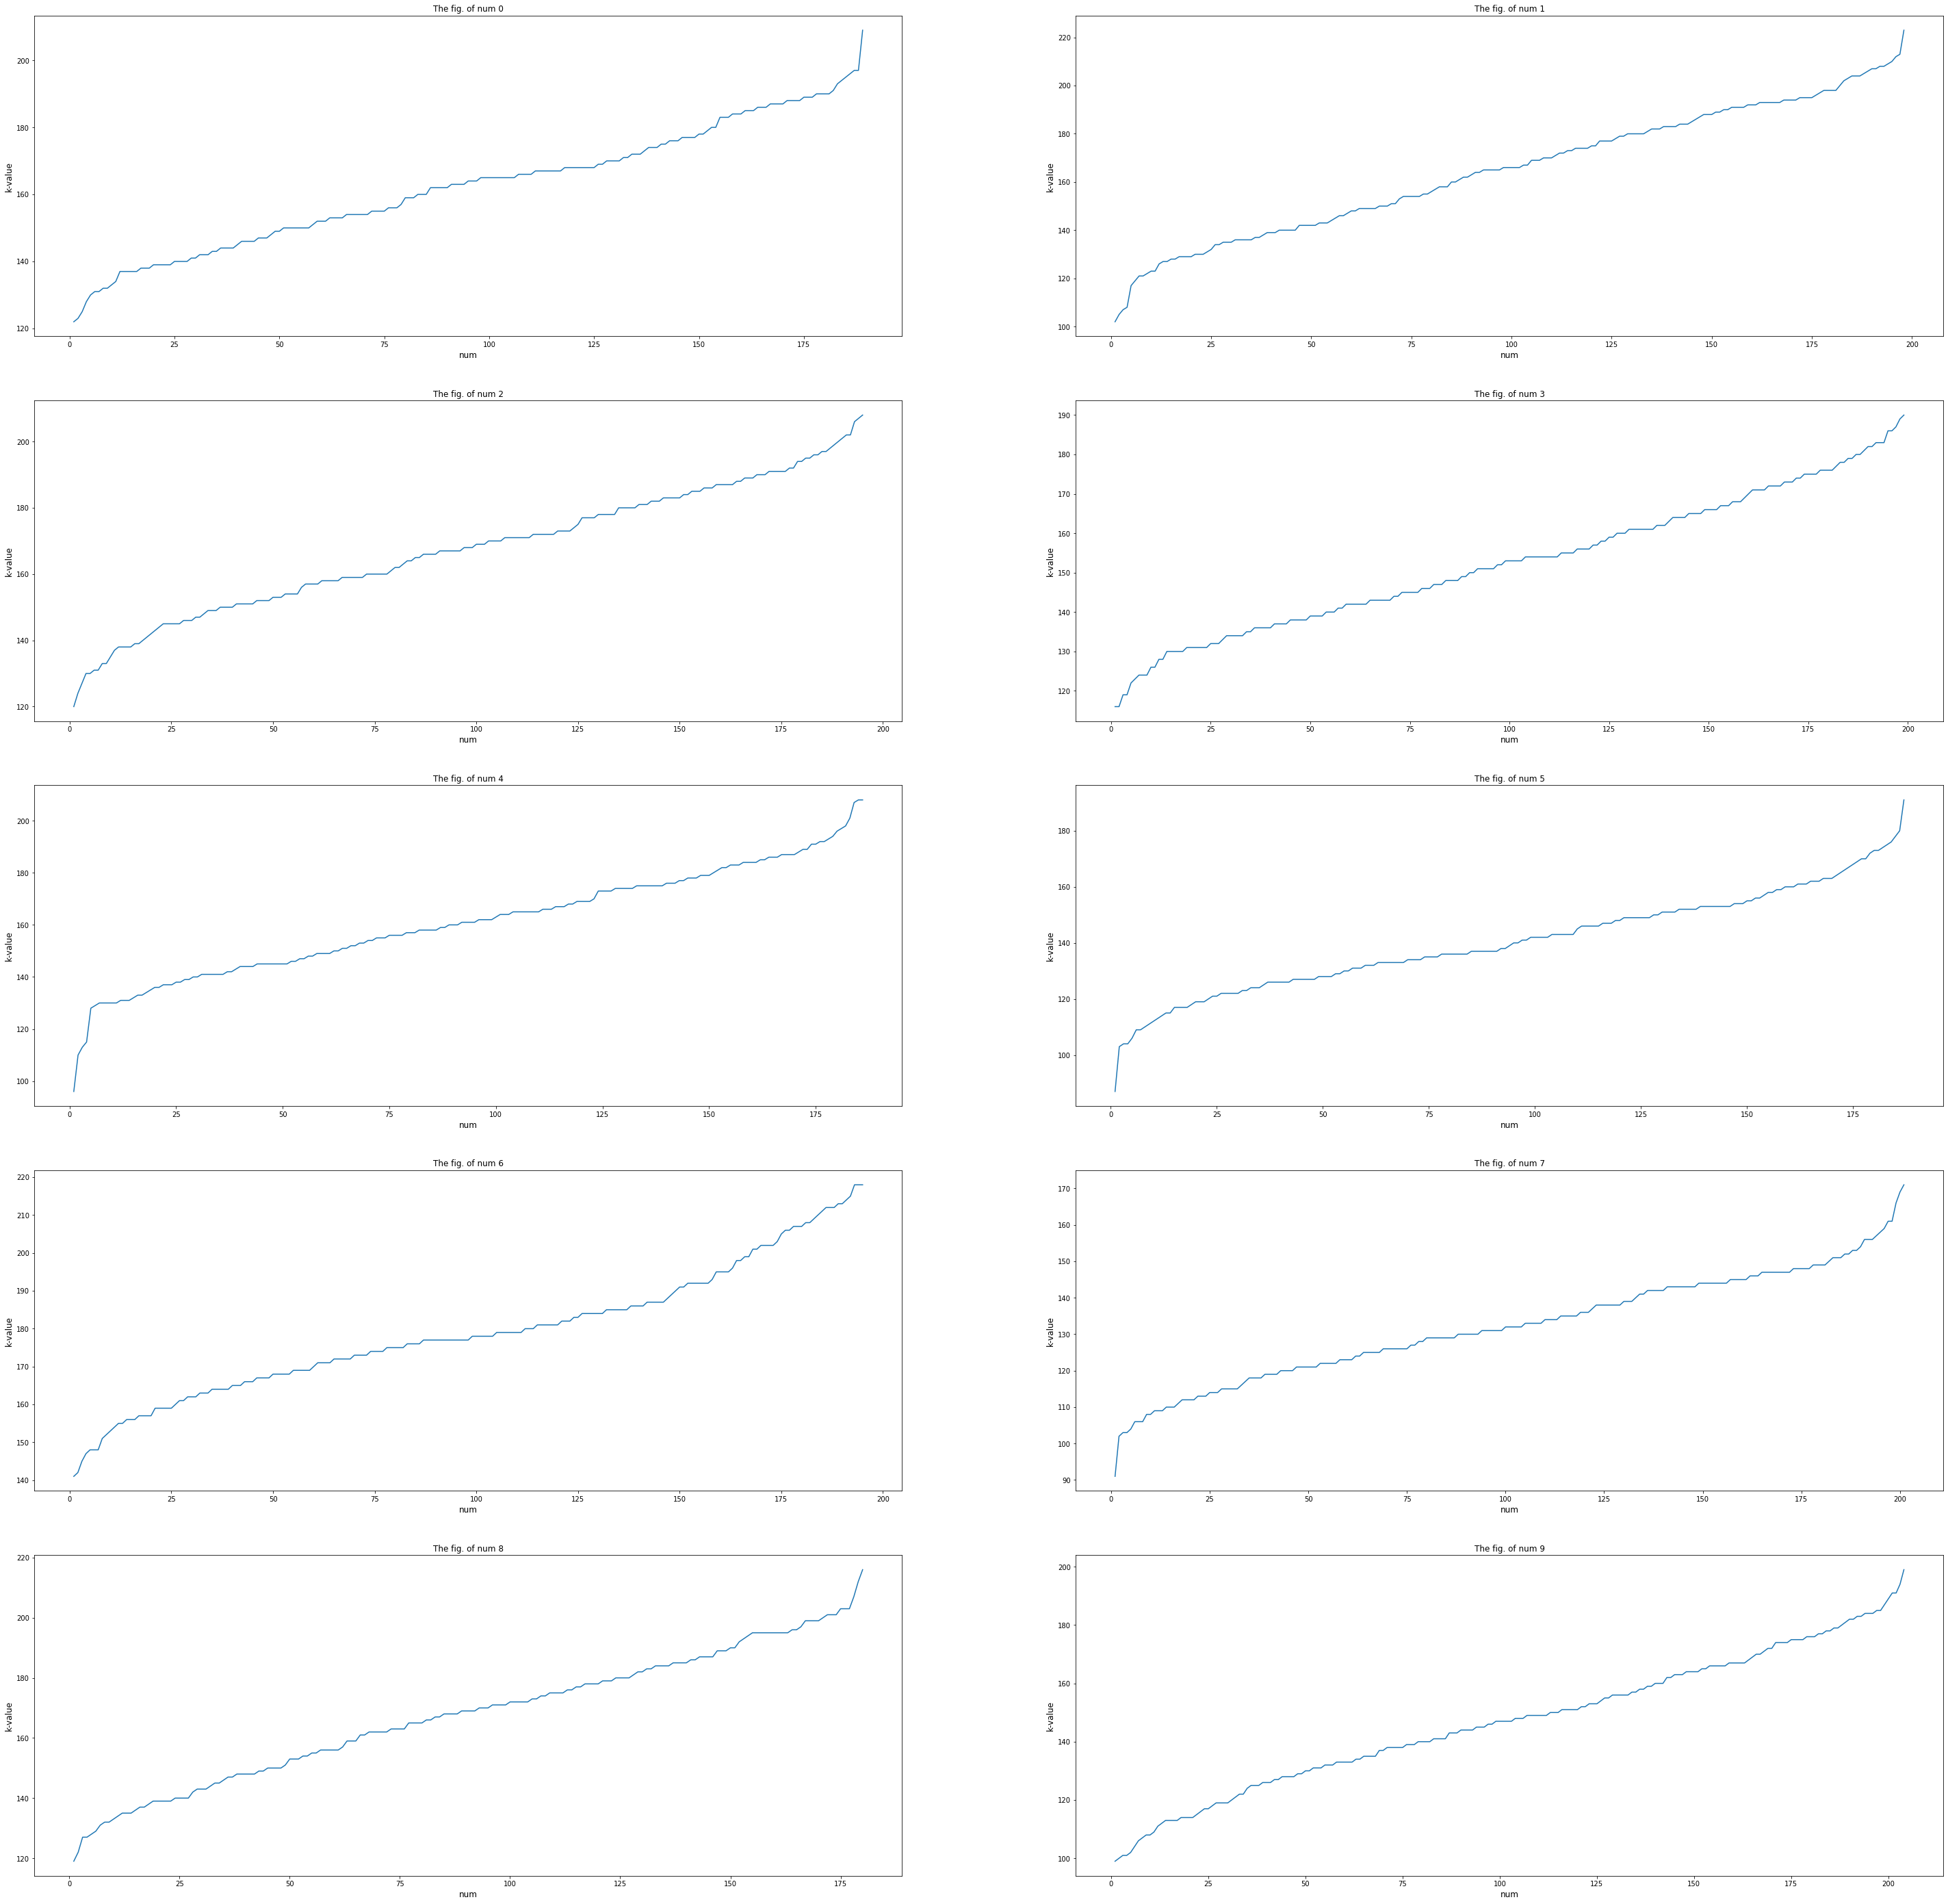

In [16]:
## compute
lists = np.zeros((10, 1024), dtype = np.int)
list_len = np.linspace(0,0,10, dtype=np.int)
for i in range(train_matrix.shape[0]):
    train_vec = train_matrix[i]
    train_lab = train_label[i]
    train_val = kmeans(train_vec)
#     print("test label : %d    test value :  %d" %(train_lab, train_val))  
    lists[train_lab][list_len[train_lab]] = train_val
    list_len[train_lab] = list_len[train_lab] + 1
    
lists_plot(lists, list_len)

-------------------------  Test  ----------------------------

In [ ]:
np.set_printoptions(threshold=np.inf)
filepath = FILESRC + 'testDigits\\\\'
test_src1 = filepath + '0_0.txt'
test_vect = mat2vect(test_src1)
test_val = kmeans(test_vect)
print(test_val)

In [ ]:
###################  new knn test main  #####################
## compute

for i in range(test_matrix.shape[0]):
    test_vec = test_matrix[i]
    test_lab = test_label[i]
    test_res = knn_2(test_vec, train_matrix, train_label, K)
#     print("knn result: %d  ,  real: %d " % (test_res, test_lab))
    if test_lab != test_res:
        error_num = error_num + 1

## output
all_num = test_matrix.shape[0]
corrcet_num = all_num - error_num
corrcet_percent = (corrcet_num / all_num) * 100
print("Test number :  %d  " %(all_num))        
print("Error number :  %d " %(error_num))
print("Correct number : %d" %(corrcet_num))
print("Correct percent : %.2f%%" %(corrcet_percent))